# Lectura y graficación de una señal almacenada en un archivo txt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

## Abrimos el archivo txt para ver  el contenido

In [2]:
f = open("primeramanuel.txt","r")
raw_data = f.read()  # con f.read() leemos todo el contenido
f.close()

raw_data

'# OpenSignals Text File Format. Version 1\n# {"98:D3:71:FD:62:1E": {"position": 0, "device": "bitalino_rev", "device name": "98:D3:71:FD:62:1E", "device connection": "BTH98:D3:71:FD:62:1E", "sampling rate": 1000, "resolution": [4, 1, 1, 1, 1, 10], "firmware version": 1282, "comments": "", "keywords": "", "mode": 0, "sync interval": 2, "date": "2023-4-12", "time": "12:3:42.459", "channels": [2], "sensor": ["EGGBIT"], "label": ["A2"], "column": ["nSeq", "I1", "I2", "O1", "O2", "A2"], "special": [{}], "digital IO": [0, 0, 1, 1]}}\n# EndOfHeader\n0\t0\t0\t0\t0\t509\t\n1\t0\t0\t0\t0\t507\t\n2\t0\t0\t0\t0\t505\t\n3\t0\t0\t0\t0\t504\t\n4\t0\t0\t0\t0\t507\t\n5\t0\t0\t0\t0\t511\t\n6\t0\t0\t0\t0\t516\t\n7\t0\t0\t0\t0\t521\t\n8\t0\t0\t0\t0\t524\t\n9\t0\t0\t0\t0\t525\t\n10\t0\t0\t0\t0\t527\t\n11\t0\t0\t0\t0\t527\t\n12\t0\t0\t0\t0\t524\t\n13\t0\t0\t0\t0\t520\t\n14\t0\t0\t0\t0\t514\t\n15\t0\t0\t0\t0\t512\t\n0\t0\t0\t0\t0\t509\t\n1\t0\t0\t0\t0\t508\t\n2\t0\t0\t0\t0\t509\t\n3\t0\t0\t0\t0\t511\t\n4\t0

In [3]:
## Expresion regular para buscar automaticamente el contenido de un numero dentro de un string
x = re.findall("[0-5][0-9]\d", raw_data)

print(x)


['100', '128', '202', '459', '509', '507', '505', '504', '507', '511', '516', '521', '524', '525', '527', '527', '524', '520', '514', '512', '509', '508', '509', '511', '511', '512', '514', '515', '516', '518', '519', '519', '518', '515', '512', '508', '506', '505', '505', '504', '505', '509', '512', '516', '520', '523', '524', '524', '524', '523', '521', '518', '515', '512', '508', '505', '504', '504', '508', '511', '515', '519', '520', '518', '516', '514', '513', '510', '507', '503', '502', '503', '503', '503', '504', '508', '513', '516', '519', '521', '524', '522', '519', '515', '513', '510', '507', '505', '504', '503', '501', '502', '505', '510', '515', '519', '520', '518', '517', '514', '511', '508', '506', '505', '504', '502', '501', '500', '500', '501', '502', '506', '511', '512', '512', '512', '511', '508', '507', '505', '502', '500', '498', '499', '500', '503', '508', '513', '519', '523', '526', '527', '526', '524', '522', '519', '516', '516', '516', '516', '519', '522', '525'

In [4]:
Fs = 1000
Ts=1/Fs

print(f" Fs={Fs} hz\n Ts={Ts} s")

 Fs=1000 hz
 Ts=0.001 s


## Leemos el archivo excluyendo las 2 primeras filas del archivo

In [5]:
array = np.genfromtxt("primeramanuel.txt", delimiter="\t",skip_header = 3)
array

array([[  0.,   0.,   0., ...,   0., 509.,  nan],
       [  1.,   0.,   0., ...,   0., 507.,  nan],
       [  2.,   0.,   0., ...,   0., 505.,  nan],
       ...,
       [  9.,   0.,   0., ...,   0., 515.,  nan],
       [ 10.,   0.,   0., ...,   0., 519.,  nan],
       [ 11.,   0.,   0., ...,   0., 520.,  nan]])

## Ploteamos la lectura

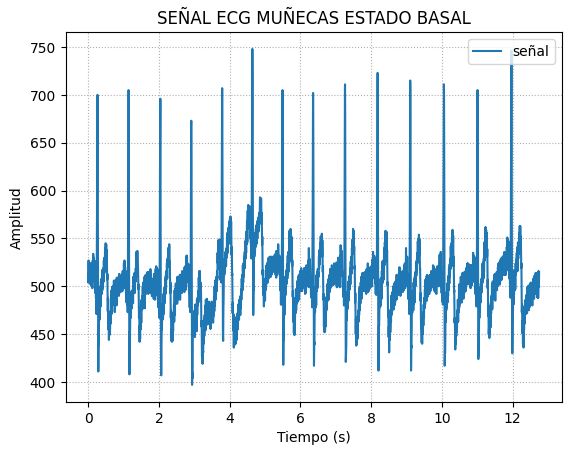

In [7]:
arr = []
for i in range(int(len(array[:,-2])/2) ):
    arr.append(i/Fs)
               
plt.plot(arr , array[:int(len(array[:,-2]) /2),-2], label="señal")      # graficamos la señal
plt.grid(linestyle=":")
plt.title("SEÑAL ECG MUÑECAS ESTADO BASAL")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend(loc="upper right")
plt.show()


## La forma de sabes la frecuencia de la señal es viendo en el dominio de la frecuencia

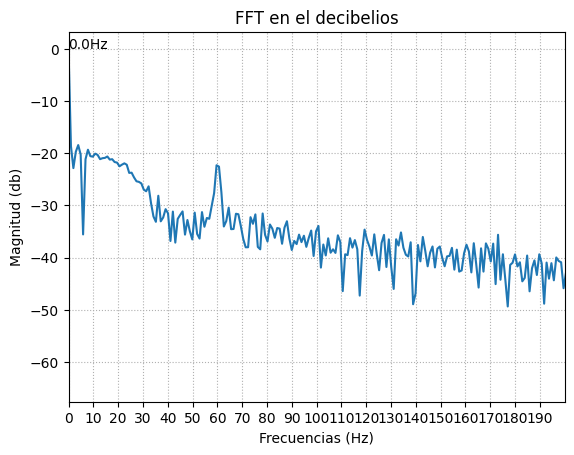

In [8]:
N = 2**10                                     # 10 bits, 0-1023

signal1 = array[:,-2]

signal_fft = np.fft.fft(signal1, N)           # fft magtinud
signal_fft = np.round(np.abs(signal_fft),3)[0:N//2] # nos quedamos con los componente de la derecha de la FFT
signal_aux = signal_fft/signal_fft.max()     # hallamos el maximo para pasar la magnitud a escala db

with np.errstate(divide='ignore'):
    signal_fft_db = 10*np.log10(signal_aux)  # , out=signal_aux, where=signal_aux >= 0 para evitar division por zero

F_list = np.linspace(0,Fs/2, N//2)
F = np.round(F_list[np.argmax(signal_fft_db)], 1)   # argmax, encuentra el argumento max en un array

plt.plot(F_list, signal_fft_db)  #10 * np.log10(P / Pref) , decibelios
plt.text(F,0, f"{F}Hz")
plt.grid(linestyle=":")
plt.ylabel("Magnitud (db)")
plt.xlabel("Frecuencias (Hz)")
plt.title("FFT en el decibelios")
plt.xlim([0,200])
plt.xticks(np.arange(0,200,10))
plt.show()